In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

data = pd.read_csv('flight.csv')
df = data.copy()

# Exploratory Data Analysis (EDA)

### Check Null Value, Missing Value, and Data Types

In [2]:
# df.head(5)
df[df['WORK_CITY']=='.']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
20,21501,7/30/2008,11/21/2008,Male,6,.,beijing,CN,49.0,3/31/2014,106,220641,69566.0,122763.0,167113,3/28/2014,4,6.438095,31,4,1.369404,251134,9
27,47114,1/15/2005,3/17/2005,Male,6,.,beijing,CN,47.0,3/31/2014,74,209810,101398.0,83139.0,148685,3/21/2014,11,9.493151,51,8,1.433364,235176,14
40,18793,4/25/2006,6/2/2006,Male,6,.,beijing,CN,48.0,3/31/2014,98,191809,88788.0,85119.0,137876,3/30/2014,2,7.505155,46,11,1.458541,210435,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61806,4388,4/20/2011,12/10/2011,Male,4,.,beijing,CN,40.0,3/31/2014,2,634,756.0,0.0,1586,2/1/2013,425,1.000000,1,0,0.571627,634,0
62035,10787,8/29/2012,10/16/2013,Male,6,.,beijing,CN,55.0,3/31/2014,2,776,0.0,1044.0,1199,10/18/2013,166,2.000000,2,0,0.707698,1133,3
62099,41502,1/1/2012,1/1/2012,Female,4,.,shanghai,CN,44.0,3/31/2014,2,692,NaN,0.0,2085,6/5/2012,666,2.000000,2,0,0.400000,692,0
62546,15528,6/3/2012,6/3/2012,Male,4,.,beijing,CN,44.0,3/31/2014,2,576,970.0,0.0,1629,3/14/2013,384,284.000000,284,0,0.417772,576,0


**There are 667 rows from WORK_CITY and WORK_PROVINCE feature with a single character only (.) instead of the name of the city**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

**The following feature has a missing value on it:**
1. GENDER
2. WORK_CITY
3. WORK_PROVINCE
4. WORK_COUNTRY
5. AGE
6. SUM_YR_1
7. SUM_YR_2

**Also, the date time features like FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, and LAST_FLIGHT_DATE is not on the proper types as well**

### Check Duplicate Values

In [5]:
df.duplicated().sum()

0

**No duplicate values found on the dataset**

### Descriptive Analysis

In [6]:
numericals = ['AGE', 'FFP_TIER', 'EXCHANGE_COUNT','FLIGHT_COUNT', 'BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL', 'MAX_INTERVAL','avg_discount','Points_Sum','Point_NotFlight']
categoricals = ['FFP_DATE','GENDER','FIRST_FLIGHT_DATE','WORK_CITY', 'WORK_PROVINCE','WORK_COUNTRY','LAST_FLIGHT_DATE']

#LOAD_TIME only contain one value

In [7]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**Almost all the features are having a quite major of the gap between min and max OR Q3 and max (outliers indications), except for the following features:**
1. FFP_TIER
2. EXCHANGE_COUNT
3. avg_discount

### Univariate Analysis

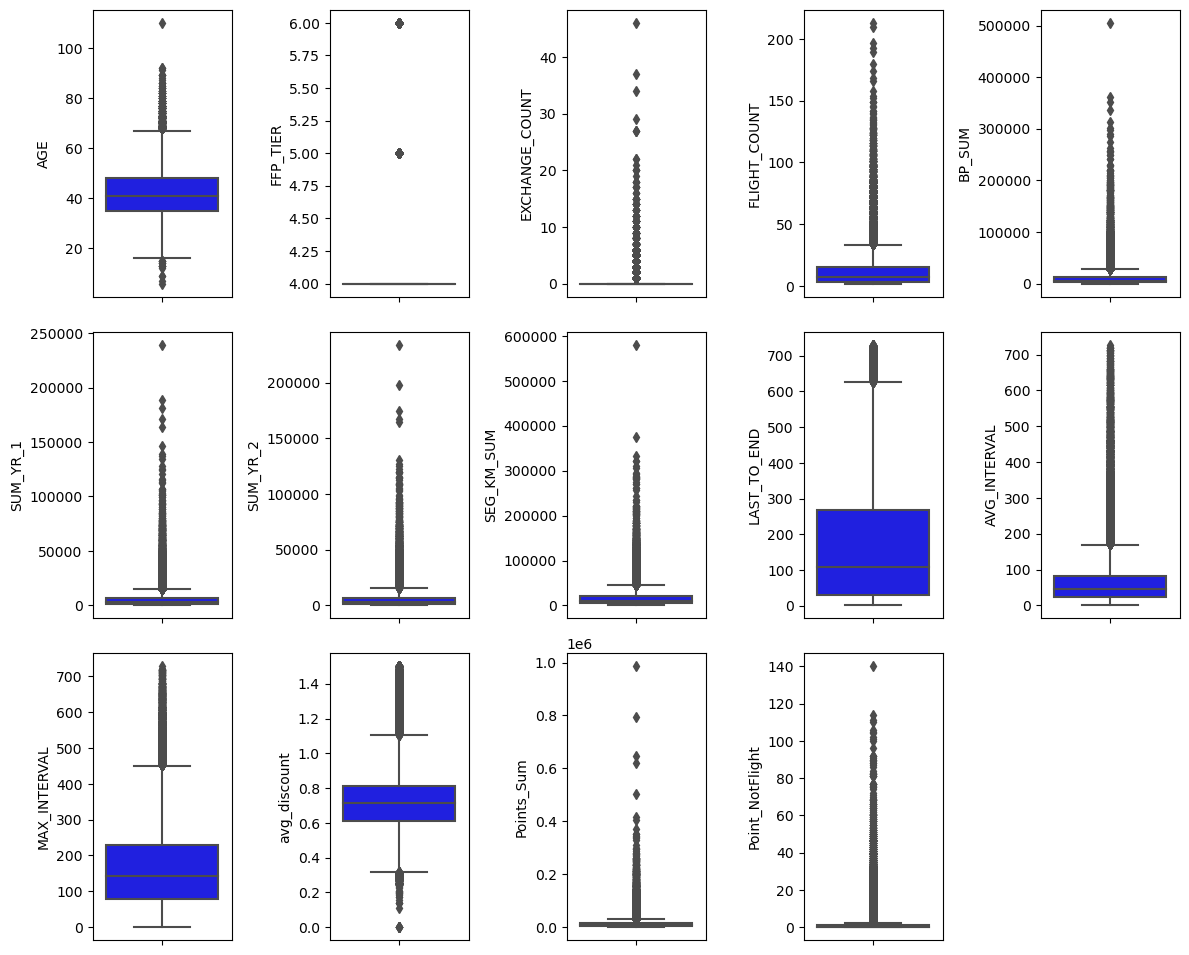

In [8]:
plt.figure(figsize=(12,45))
for i in range(0, len(numericals)):
    plt.subplot(len(numericals), 5,i+1)
    sns.boxplot(y=df[numericals[i]], color='blue', orient='v')
    plt.tight_layout()

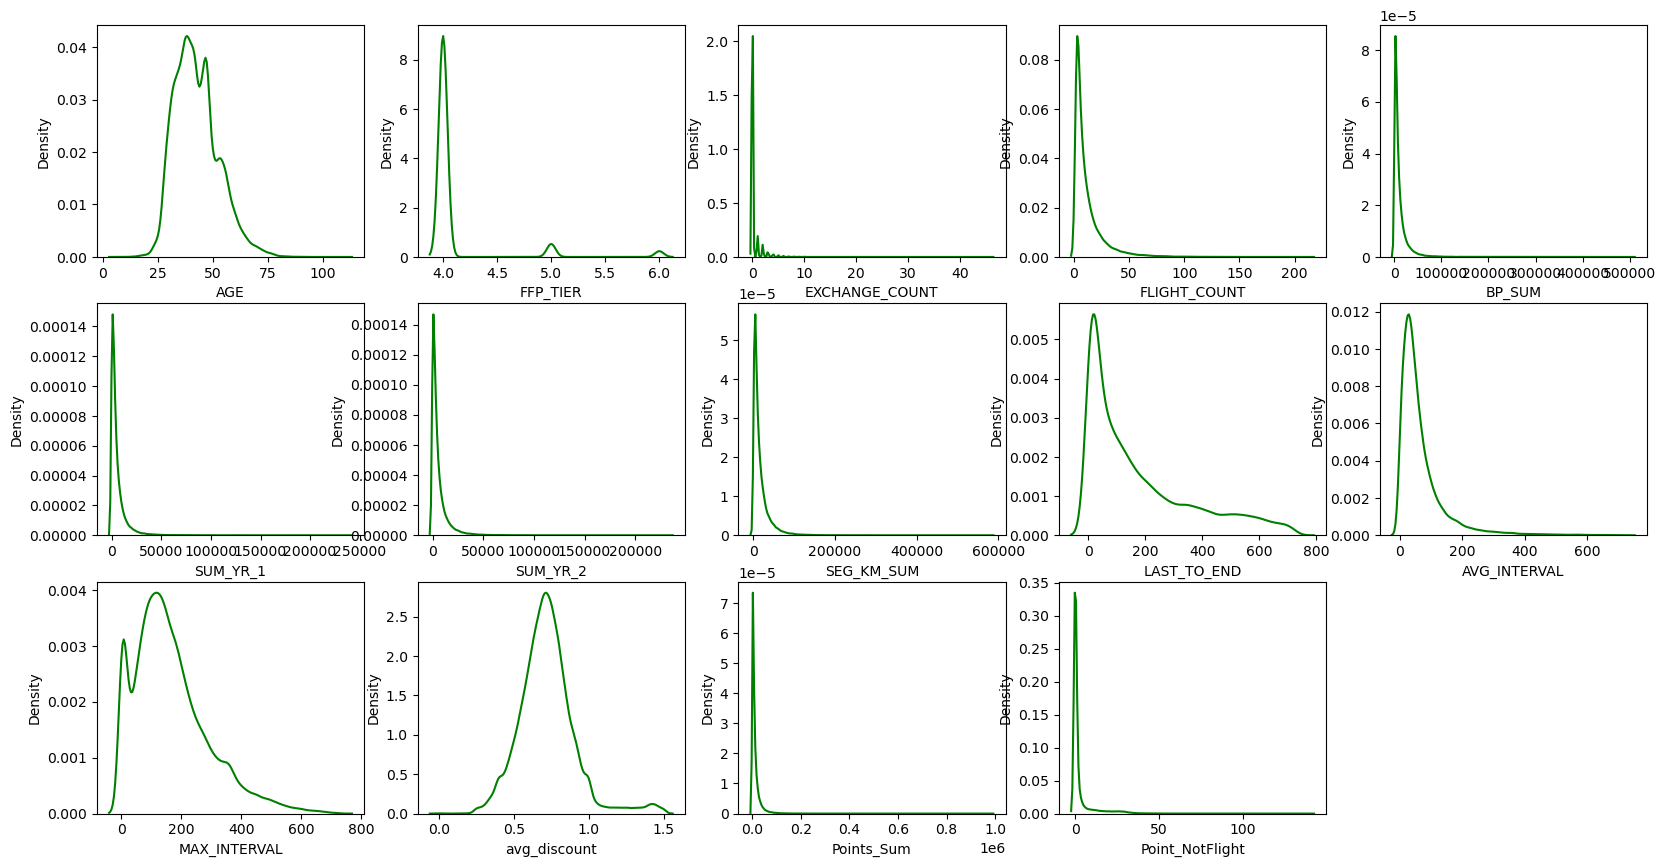

In [9]:
plt.figure(figsize=(20,50))
for i in range(len(numericals)):
    plt.subplot(len(numericals), 5, i+1)
    sns.kdeplot(x=df[numericals[i]], color='green')

**The only feature with normal distribution is AGE**

### Multivariate Analysis

<AxesSubplot:>

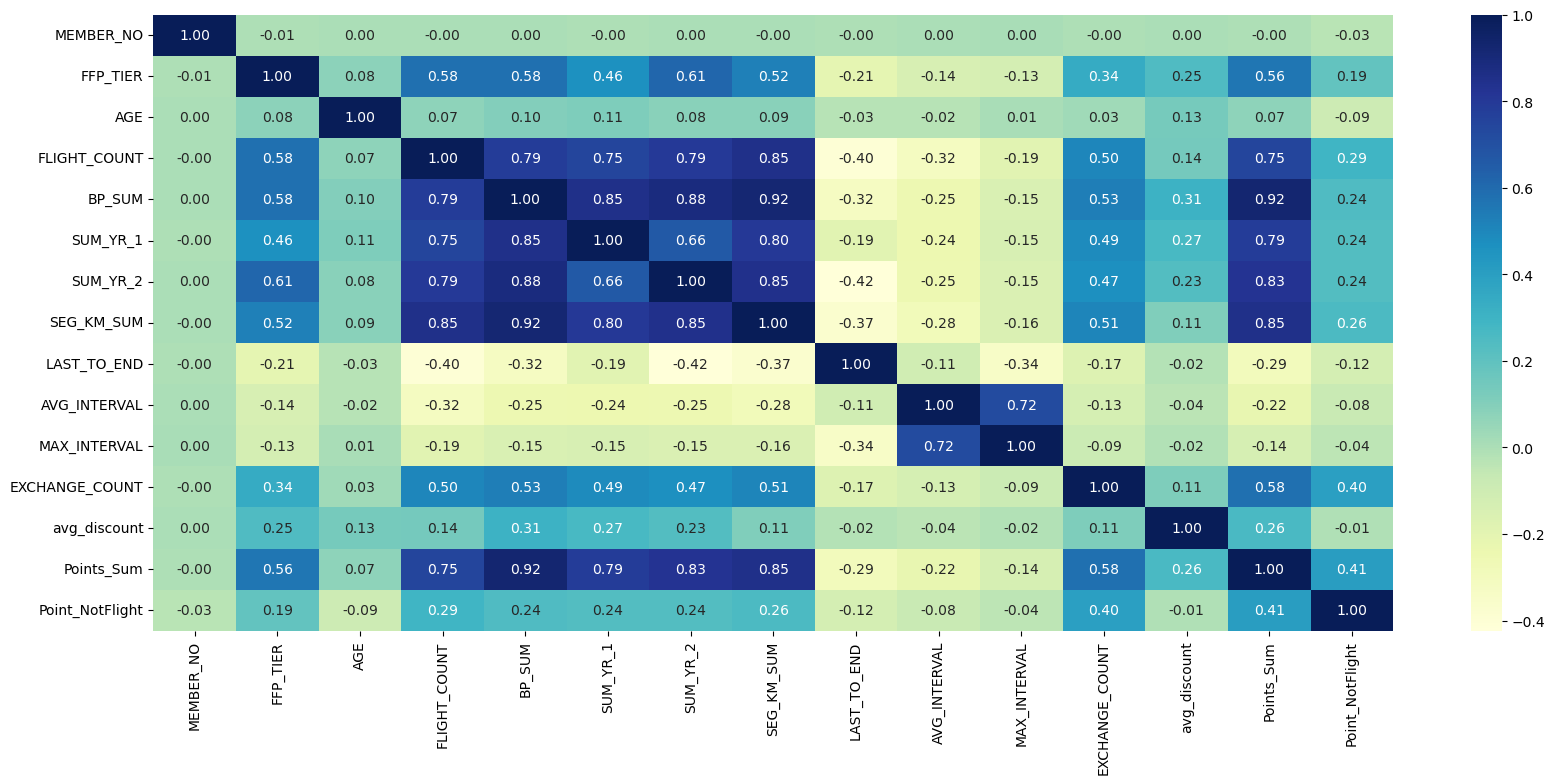

In [10]:
corr = df.corr(method='pearson')

plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu')

In [11]:
high_corr = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7: # jika korelasi lebih besar dari 0.7
            print(f"{corr.columns[i]} and {corr.columns[j]} have a correlation of \033[1m{corr.iloc[i, j]:.2f}\033[0m")
            high_corr.append((corr.columns[i], corr.columns[j]))

print(f"Features with High Correlation: {high_corr}")

BP_SUM and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_1 and FLIGHT_COUNT have a correlation of 0.75
SUM_YR_1 and BP_SUM have a correlation of 0.85
SUM_YR_2 and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_2 and BP_SUM have a correlation of 0.88
SEG_KM_SUM and FLIGHT_COUNT have a correlation of 0.85
SEG_KM_SUM and BP_SUM have a correlation of 0.92
SEG_KM_SUM and SUM_YR_1 have a correlation of 0.80
SEG_KM_SUM and SUM_YR_2 have a correlation of 0.85
MAX_INTERVAL and AVG_INTERVAL have a correlation of 0.72
Points_Sum and FLIGHT_COUNT have a correlation of 0.75
Points_Sum and BP_SUM have a correlation of 0.92
Points_Sum and SUM_YR_1 have a correlation of 0.79
Points_Sum and SUM_YR_2 have a correlation of 0.83
Points_Sum and SEG_KM_SUM have a correlation of 0.85
Features with High Correlation: [('BP_SUM', 'FLIGHT_COUNT'), ('SUM_YR_1', 'FLIGHT_COUNT'), ('SUM_YR_1', 'BP_SUM'), ('SUM_YR_2', 'FLIGHT_COUNT'), ('SUM_YR_2', 'BP_SUM'), ('SEG_KM_SUM', 'FLIGHT_COUNT'), ('SEG_KM_SUM', 'BP_SUM'), 

**Based on the multivariate analysis above, some features have high correlation scores with the other feature. This means there is a redundant possibility among those features. Thus, it needs further analysis to determine whether one of the features should be deleted or not**

**Moreover, since the date-time feature such as FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, and LAST_FLIGHT_DATE are already represented by the AVG_INTERVAL, which informed the average flight time, it will be deleted in the next step**

# Data Preprocessing

### Handling Missing and Incorrect Value

In [12]:
df[categoricals].describe()

,FFP_DATE,GENDER,FIRST_FLIGHT_DATE,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LAST_FLIGHT_DATE
count,62988,62985,62988,60719,59740,62962,62988
unique,3068,2,3406,3234,1165,118,731
top,1/13/2011,Male,2/16/2013,guangzhou,guangdong,CN,3/31/2014
freq,184,48134,96,9386,17509,57748,959


In [13]:
mode_value_work_city = df['WORK_CITY'].mode()[0]
mode_value_work_province = df['WORK_PROVINCE'].mode()[0]

df['WORK_CITY'] = df['WORK_CITY'].replace('.', mode_value_work_city)
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].replace('.', mode_value_work_province)

In [14]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,guangzhou,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,guangzhou,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [15]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [16]:
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)
df['AGE'].fillna(df['AGE'].mode(), inplace=True)

**Filling the missing value with Mode**

In [17]:
#Deleting Member ID Column
df = df.drop(columns=['MEMBER_NO'])

In [18]:
df.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
40883,6/5/2007,4/30/2008,Male,4,beijing,beijing,CN,43.0,3/31/2014,2,4605,1454.0,2550.0,3741,4/10/2013,357,356.00,356,0,1.191767,4605,0
11394,7/19/2011,7/19/2011,Male,4,daqing,heilongjiang,CN,45.0,3/31/2014,21,17036,10457.0,6770.0,25478,3/29/2014,3,34.90,136,0,0.779382,17036,0
35304,10/30/2006,12/19/2006,Male,4,shantou,guangdong,CN,45.0,3/31/2014,11,5405,7754.0,1500.0,8150,5/13/2013,324,28.00,83,0,0.714804,5405,0
19037,6/29/2008,4/8/2009,Male,4,shanghai,shanghai,CN,44.0,3/31/2014,17,10216,0.0,0.0,17697,5/10/2013,327,25.25,102,0,0.725812,12225,11
38870,12/5/2011,8/29/2012,Male,4,guangzhou,guangdong,CN,31.0,3/31/2014,6,3060,2117.0,2388.0,9426,2/13/2014,48,106.60,282,0,0.520536,15704,29


### Encode All Categoricals Value

In [19]:
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
df_encode = df.copy()
for i in cats:
    df_encode[i] = df_encode[i].astype('category').cat.codes

In [20]:
df_encode.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
4182,6/19/2008,9/3/2008,1,5,2074,906,24,40.0,3/31/2014,33,24538,15555.0,17073.0,65040,3/2/2014,30,21.906250,92,1,0.577499,24638,2
13042,10/24/2010,2/18/2011,1,4,2920,957,24,47.0,3/31/2014,23,14894,8682.0,4581.0,22394,3/22/2014,10,32.500000,139,0,0.798683,14894,0
61604,7/23/2010,8/1/2010,1,4,2084,909,24,83.0,3/31/2014,2,1030,0.0,1115.0,1134,6/22/2013,284,3.000000,3,0,0.845000,1030,0
14974,5/5/2010,5/5/2010,0,4,3179,946,24,55.0,3/31/2014,24,15703,10782.0,4575.0,17801,2/22/2014,39,29.304348,116,4,0.896298,15703,4
2358,8/11/2007,10/31/2008,1,6,2731,906,24,52.0,3/31/2014,59,46641,23312.0,23577.0,58247,3/9/2014,23,12.206897,73,0,0.840673,49982,0


### Removing Redundant and Unnecessary Features

**Based on the correlation analysis before and the Feature Importance analysis, therefore, the following features will be deleted due to redundant and unnecessary value:**
1. FLIGHT_COUNT
2. BP_SUM
3. SUM_YR_1
4. SUM_YR_2
5. SEG_KM_SUM
6. MAX_INTERVAL
7. LAST_FLIGHT_DATE
8. FFP_DATE 
9. FIRST_FLIGHT_DATE
10. LOAD_TIME

In [21]:
df_encode.drop(columns=['FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM',
                        'MAX_INTERVAL', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'], inplace=True)

In [22]:
df_encode.sample(5)

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
53176,1,4,2510,972,24,47.0,146,0.00,0,1.410000,27452,31
37344,0,4,1587,411,54,35.0,222,70.00,0,0.673979,2816,0
23380,0,4,2731,906,24,40.0,63,19.90,0,0.595703,8495,0
40236,0,4,1838,977,24,30.0,415,30.00,0,0.792182,3487,0
36645,1,4,2084,906,24,29.0,143,53.75,0,0.512840,4046,0


### Removing Outliers

In [23]:
def remove_outliers(column):
    filtered_entries = np.array([True] * len(df))
    for col in column:
        Q1 = df_encode[col].quantile(0.25)
        Q3 = df_encode[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1-(1.5*IQR)
        high_limit = Q3+(1.5*IQR)
        filtered_entries = ((df_encode[col] >= low_limit) & (df_encode[col] <= high_limit)) & filtered_entries
    
    return df_encode[filtered_entries]

In [24]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           62988 non-null  int8   
 1   FFP_TIER         62988 non-null  int64  
 2   WORK_CITY        62988 non-null  int16  
 3   WORK_PROVINCE    62988 non-null  int16  
 4   WORK_COUNTRY     62988 non-null  int8   
 5   AGE              62568 non-null  float64
 6   LAST_TO_END      62988 non-null  int64  
 7   AVG_INTERVAL     62988 non-null  float64
 8   EXCHANGE_COUNT   62988 non-null  int64  
 9   avg_discount     62988 non-null  float64
 10  Points_Sum       62988 non-null  int64  
 11  Point_NotFlight  62988 non-null  int64  
dtypes: float64(3), int16(2), int64(5), int8(2)
memory usage: 4.2 MB


In [25]:
df_encode = remove_outliers(df_encode.columns)

In [26]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24563 entries, 1839 to 62974
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           24563 non-null  int8   
 1   FFP_TIER         24563 non-null  int64  
 2   WORK_CITY        24563 non-null  int16  
 3   WORK_PROVINCE    24563 non-null  int16  
 4   WORK_COUNTRY     24563 non-null  int8   
 5   AGE              24563 non-null  float64
 6   LAST_TO_END      24563 non-null  int64  
 7   AVG_INTERVAL     24563 non-null  float64
 8   EXCHANGE_COUNT   24563 non-null  int64  
 9   avg_discount     24563 non-null  float64
 10  Points_Sum       24563 non-null  int64  
 11  Point_NotFlight  24563 non-null  int64  
dtypes: float64(3), int16(2), int64(5), int8(2)
memory usage: 1.8 MB


In [27]:
df_encode.isna().sum()

GENDER             0
FFP_TIER           0
WORK_CITY          0
WORK_PROVINCE      0
WORK_COUNTRY       0
AGE                0
LAST_TO_END        0
AVG_INTERVAL       0
EXCHANGE_COUNT     0
avg_discount       0
Points_Sum         0
Point_NotFlight    0
dtype: int64

### Data Transform

In [28]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(df_encode)
X_std = pd.DataFrame(X_scaled, columns=df_encode.columns)

In [29]:
X_std.describe()

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,24563.0,24563.0,2.456300e+04,2.456300e+04,24563.0,2.456300e+04,2.456300e+04,2.456300e+04,24563.0,2.456300e+04,2.456300e+04,2.456300e+04
mean,0.0,0.0,2.617302e-15,1.114327e-15,0.0,5.867734e-17,1.752713e-15,5.545714e-16,0.0,6.998972e-16,1.299652e-16,-1.942402e-14
std,0.0,0.0,1.000020e+00,1.000020e+00,0.0,1.000020e+00,1.000020e+00,1.000020e+00,0.0,1.000020e+00,1.000020e+00,1.000020e+00
min,0.0,0.0,-3.694706e+00,-1.932481e+00,0.0,-2.989287e+00,-1.035428e+00,-1.499910e+00,0.0,-2.755636e+00,-1.199314e+00,-3.355759e-01
25%,0.0,0.0,-9.844436e-01,-5.714507e-01,0.0,-7.184276e-01,-8.342219e-01,-7.280436e-01,0.0,-6.525254e-01,-7.458839e-01,-3.355759e-01
50%,0.0,0.0,-4.414862e-01,-3.320102e-01,0.0,-3.716969e-02,-3.489606e-01,-2.104424e-01,0.0,1.587918e-02,-3.045086e-01,-3.355759e-01
75%,0.0,0.0,8.729233e-01,5.627411e-01,0.0,6.440882e-01,5.683016e-01,5.641298e-01,0.0,6.757800e-01,4.516694e-01,-3.355759e-01
max,0.0,0.0,2.010872e+00,2.264029e+00,0.0,2.801405e+00,2.663210e+00,2.983811e+00,0.0,2.864661e+00,3.945857e+00,4.658518e+00


### Dimensional Reduction

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_std)
pdf = pd.DataFrame(data = pcs, columns = ['pc1','pc2'])

In [31]:
pdf.describe()

,pc1,pc2
count,2.456300e+04,2.456300e+04
mean,-5.842038e-16,4.995167e-16
std,1.267295e+00,1.221186e+00
min,-3.651761e+00,-3.257009e+00
25%,-8.967219e-01,-8.971361e-01
50%,-1.288336e-01,-7.365273e-02
75%,7.663442e-01,9.227786e-01
max,5.581986e+00,4.399057e+00


# Identify Number of Clusters

### Identify the optimal number of cluster

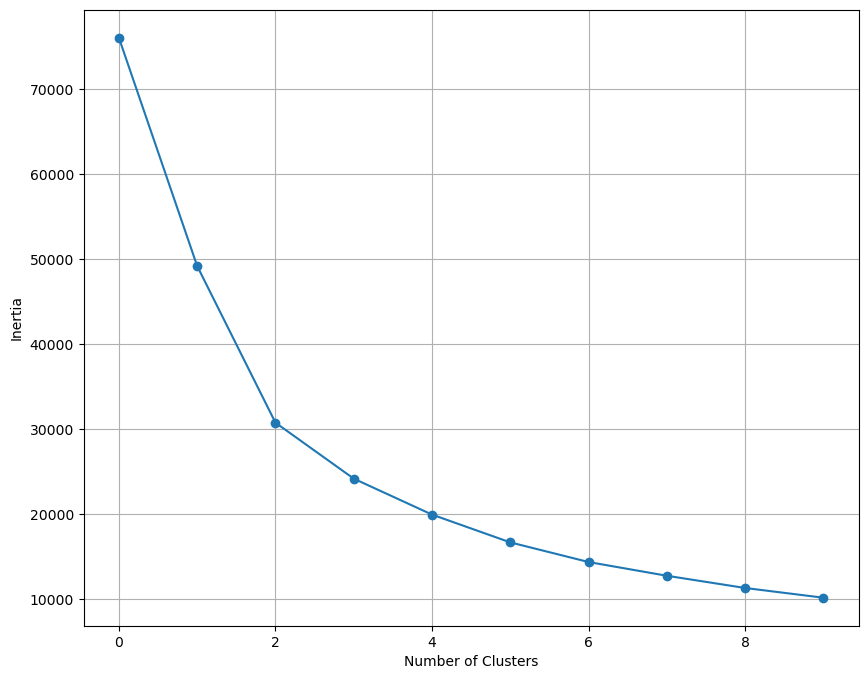

In [32]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pdf.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(inertia,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Based on the Elbow Graph above, the optimal number of clusters would be 2/3/4 clusters**

# Evaluate Model

Silhouette average score for k=2:  0.35126957470064596
Silhouette average score for k=3:  0.3837710351872155
Silhouette average score for k=4:  0.3614078605911084
Silhouette average score for k=5:  0.33725518662051124
Silhouette average score for k=6:  0.3620316702543829


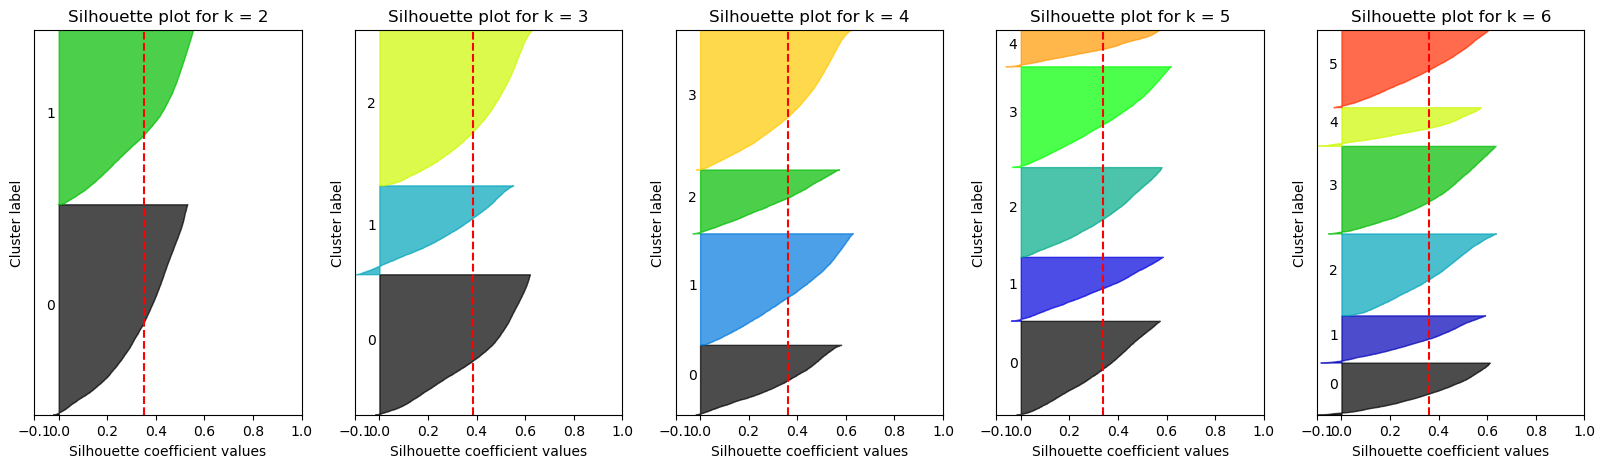

In [33]:
from sklearn.metrics import silhouette_score, silhouette_samples

# define range of k values
k_values = range(2, 7)

# create subplots
fig, axs = plt.subplots(1, len(k_values), figsize=(20, 5))

# iterate over each k value
for i, k in enumerate(k_values):
    # fit k-means model
    kmeans_eval = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    #labels = kmeans_eval.labels_
    labels = kmeans_eval.fit_predict(pdf)

    # calculate silhouette score
    silhouette_avg = silhouette_score(pdf, labels)

    # calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pdf, labels)

    print(f"Silhouette average score for k={k}: ", silhouette_avg)
    
    # plot silhouette plot
    y_lower = 10
    axs[i].set_xlim([-0.1, 1])
    axs[i].set_ylim([0, len(pdf) + (k + 1) * 10])
    axs[i].set_title('Silhouette plot for k = {}'.format(k))
    axs[i].set_xlabel('Silhouette coefficient values')
    axs[i].set_ylabel('Cluster label')

    for j in range(k):
        # aggregate silhouette scores for samples in cluster j
        ith_cluster_silhouette_values = sample_silhouette_values[labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / k)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper),
                              0,
                              ith_cluster_silhouette_values,
                              facecolor=color,
                              edgecolor=color,
                              alpha=0.7)

        # label silhouette plots with their cluster numbers at the middle
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # compute new y_lower for next plot
        y_lower = y_upper + 10

    axs[i].axvline(x=silhouette_avg, color='red', linestyle='--')
    axs[i].set_yticks([])
    axs[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


**Based on the width of every cluster and the average silhouette score, it can be seen that dividing the data into every option (k = 2-6) is a good option. However, based on the silhouette score that calculates the performance of the model, dividing data into **3 clusters** is the most optimal option**

# Fitting Model - KMeans

In [34]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(pdf)

In [35]:
pdf['labels'] = kmeans.labels_

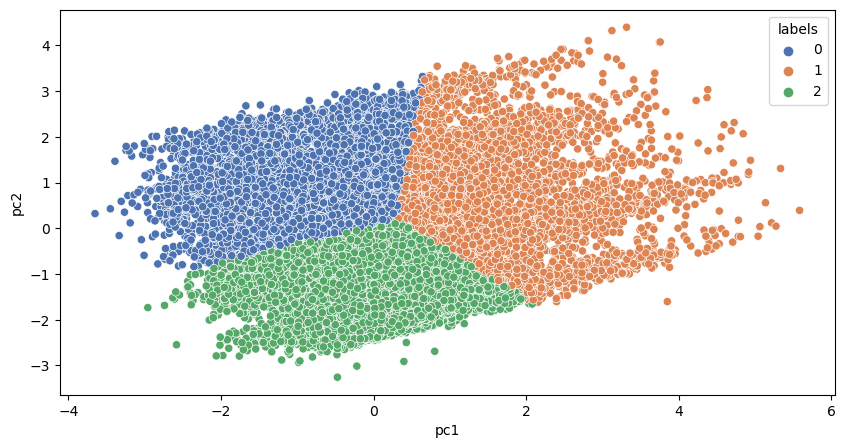

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=pdf, x='pc1', y='pc2', hue='labels', palette='deep')
# sns.pairplot(data=pdf, hue='labels', palette='deep')
plt.show()

In [37]:
pdf['labels'].value_counts()

2    9930
0    8962
1    5671
Name: labels, dtype: int64

# Business Insight

### Returning the Preprocessed dataframe to original

In [38]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24563 entries, 1839 to 62974
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           24563 non-null  int8   
 1   FFP_TIER         24563 non-null  int64  
 2   WORK_CITY        24563 non-null  int16  
 3   WORK_PROVINCE    24563 non-null  int16  
 4   WORK_COUNTRY     24563 non-null  int8   
 5   AGE              24563 non-null  float64
 6   LAST_TO_END      24563 non-null  int64  
 7   AVG_INTERVAL     24563 non-null  float64
 8   EXCHANGE_COUNT   24563 non-null  int64  
 9   avg_discount     24563 non-null  float64
 10  Points_Sum       24563 non-null  int64  
 11  Point_NotFlight  24563 non-null  int64  
dtypes: float64(3), int16(2), int64(5), int8(2)
memory usage: 1.8 MB


In [39]:
pdf.drop(columns=['labels'], inplace=True)
for col in cats:
    codes = df_encode[col].unique()
    labels = df[col].unique()
    mapping = dict(zip(codes, labels))
    df_encode[col] = df_encode[col].replace(mapping)

predict = kmeans.predict(pdf)
df_encode['labels_cluster'] = pd.Series(predict, index=df_encode.index)

In [40]:
df_encode

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,labels_cluster
1839,Male,4,guangzhou,beijing,CN,53.0,81,111.200000,0,0.745000,27912,0,1
1970,Male,4,guangzhou,beijing,CN,60.0,90,92.400000,0,0.723333,27912,0,1
2215,Male,4,Los Angeles,beijing,CN,66.0,202,98.000000,0,0.686667,27912,0,1
2271,Male,4,guangzhou,beijing,CN,49.0,130,36.090909,0,0.661214,29209,0,1
2760,Male,4,guiyang,CA,CN,39.0,17,15.714286,0,0.604975,29845,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62947,Male,4,zhanjiang,beijing,CN,62.0,450,101.000000,0,0.850000,1000,0,2
62955,Male,4,Haarlem,sichuan,CN,35.0,528,3.000000,0,0.400000,400,0,0
62961,Male,4,jixi,guangxi,CN,46.0,471,8.000000,0,0.750000,400,0,2
62962,Male,4,guangzhou,beijing,CN,31.0,492,168.000000,0,0.750000,400,0,2


In [41]:
num_dtypes = ['int32','int64','float64']
cat_dtypes = ['object']

num_df = df_encode.select_dtypes(include=num_dtypes)
cat_df = df_encode.select_dtypes(include=cat_dtypes)

numericals = num_df.columns
categoricals = cat_df.columns

In [42]:
num_info = df_encode[numericals].groupby('labels_cluster').agg(['mean', 'median', 'std', 'min', 'max'])
num_info

FFP_TIER                            AGE                         \
                   mean median  std min max       mean median       std   min   
labels_cluster                                                                  
0                   4.0    4.0  0.0   4   4  41.912966   41.0  8.747267  16.0   
1                   4.0    4.0  0.0   4   4  44.548404   44.0  8.542997  17.0   
2                   4.0    4.0  0.0   4   4  41.432931   40.0  8.796956  16.0   

                     LAST_TO_END                             AVG_INTERVAL  \
                 max        mean median         std min  max         mean   
labels_cluster                                                              
0               67.0  206.458491  157.0  174.008018   1  626    62.468523   
1               67.0   64.764239   36.0   74.972618   1  622    38.239532   
2               67.0  211.957402  162.0  175.801085   1  626    62.247684   

                                                      EXCHANGE_COUNT         \
                   median        std  min         max           mean median   
labels_cluster                                                                
0               56.750000  39.514007  0.0  169.500000            0.0    0.0   
1               34.000000  19.547441  0.0  169.666667            0.0    0.0   
2               56.630682  40.780587  0.0  169.750000            0.0    0.0   

                            avg_discount                                \
                std min max         mean    median       std       min   
labels_cluster                                                           
0               0.0   0   0     0.671158  0.673522  0.138802  0.316012   
1               0.0   0   0     0.747530  0.742038  0.107885  0.340000   
2               0.0   0   0     0.706251  0.708367  0.150636  0.316667   

                            Points_Sum                                    \
                     max          mean   median          std  min    max   
labels_cluster                                                             
0               1.105253   4756.289667   4049.0  3252.808281    0  21807   
1               1.104367  15836.315465  14988.0  5968.878135  522  31585   
2               1.104000   4874.796979   4234.0  3162.205919    0  18415   

               Point_NotFlight                           
                          mean median       std min max  
labels_cluster                                           
0                     0.055456    0.0  0.246714   0   2  
1                     0.402751    0.0  0.638301   0   2  
2                     0.052367    0.0  0.235950   0   2

In [43]:
cat_info = df_encode[categoricals].join(df_encode['labels_cluster']).groupby('labels_cluster').agg(pd.Series.mode)
cat_info

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
labels_cluster,,,,
0,Male,Haarlem,sichuan,CN
1,Male,guangzhou,beijing,CN
2,Male,wenzhou,beijing,CN


In [44]:
df_encode['labels_cluster'].value_counts()

2    9930
0    8962
1    5671
Name: labels_cluster, dtype: int64

### Labels Definition

Based on the previous clustering analysis, here are the segmentation for every cluster created:
1. Label 0: Male (41++ yo) who are from **Wenzhou, Beijing, China,** with an average flight time of **62 hours** and holds a Tier 4 membership

2. Label 1: Male (44++ yo) who are from **Guangzhou, Beijing, China,** with an average flight time of **38 hours** and holds a Tier 4 membership

3. Label 2: Male (41++ yo) who are from **Haarlem, Sichuan, China,** with an average flight time of **62 hours** and holds a Tier 4 membership

### Business Recommendation

Since people from **Beijing, China** are the highest segment of all, the company might be able to apply some bundling promo trips **from/to Beijing, China** to drive more customers.<br>
Morover, company can target customers with **Tier 4** in their membership to apply some additional discounts or other promos.